In [1]:
import jaxley as jx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import jax.numpy as jnp

# Solve accuracy

In [2]:
with open("../results/01_accuracy/time_vec.pkl", "rb") as handle:
    time_vec = pickle.load(handle)

with open("../results/01_accuracy/voltages_neuron.pkl", "rb") as handle:
    voltages_neuron = pickle.load(handle)

with open("../results/01_accuracy/voltages_jaxley.pkl", "rb") as handle:
    voltages_jaxley = pickle.load(handle)

### Panel A1

In [3]:
nseg_per_branch = 4
fname = "../morphologies/n144.swc"   #n144, n173
cell = jx.read_swc(fname, nseg_per_branch, max_branch_len=300.0)
# cell.rotate(180)

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


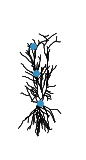

In [4]:
rec_branches = [0, 34, 54]
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.95 / 1.1, 2.0 / 1.1))
    ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.3})
    for r in rec_branches:
        ax = cell.branch(r).comp(3).vis(ax=ax, col="#3690c0", morph_plot_kwargs={"s": 15, "zorder": 100})
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_xlim([-200, 250])
    _ = ax.set_ylim([-300, 600])
    plt.savefig("../svg/panel_a1.svg", transparent=True, bbox_inches="tight")
    plt.show()

### Panel A2

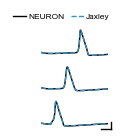

In [28]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(3, 1, figsize=(0.9, 1.3))
    for i in range(3):
        _ = ax[i].plot(time_vec, voltages_neuron[2-i], c="k")
        _ = ax[i].plot(time_vec, voltages_jaxley[2-i], c="#3690c0", linestyle="--")
        _ = ax[i].spines["top"].set_visible(False)
        _ = ax[i].spines["right"].set_visible(False)
        _ = ax[i].spines["left"].set_visible(False)
        _ = ax[i].spines["bottom"].set_visible(False)
        _ = ax[i].set_xticks([])
        _ = ax[i].set_yticks([])
        _ = ax[i].set_xlim([0, 21])
        _ = ax[i].set_ylim([-90, 47])
    _ = ax[2].plot([18, 21], [-89, -89], color="k", clip_on=False)
    _ = ax[2].plot([21, 21], [-89, -59], color="k", clip_on=False)
    ax[0].legend(
        ["NEURON", "Jaxley"],
        loc="upper right", 
        bbox_to_anchor=[1.1, 1.8, 0.0, 0.0],
        ncols=2,
        columnspacing=0.8,
        handlelength=1.5,
        handletextpad=0.3,
    )
    plt.savefig("../svg/panel_a2.svg", transparent=True, bbox_inches="tight")
    plt.show()

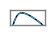

In [191]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.45, 0.2))
    _ = ax.plot(time_vec, voltages_neuron[0], c="k")
    _ = ax.plot(time_vec, voltages_jaxley[0], c="#3690c0", linestyle="--")
    _ = ax.set_xlim([4.28, 5.08])
    _ = ax.set_ylim([20, 43])
    _ = ax.spines["top"].set_visible(True)
    _ = ax.spines["right"].set_visible(True)
    _ = ax.spines["left"].set_visible(True)
    _ = ax.spines["bottom"].set_visible(True)

    ax.spines['bottom'].set_color("gray")
    ax.spines['top'].set_color("gray") 
    ax.spines['right'].set_color("gray")
    ax.spines['left'].set_color("gray")
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a3.svg", transparent=True, bbox_inches="tight")
    plt.show()

# Timing

In [81]:
computer = "vm"

timings = {
    "simulation": {"parameters": {}},
    "gradient": {"parameters": {}},
}

# Assemble timings.
for sim_or_grad in ["simulation", "gradient"]:
    for modality in ["parameters"]:
        devices = ["jaxley_cpu", "jaxley_gpu"]
        if sim_or_grad == "simulation":
            devices += ["neuron"]
        for device in devices:
            prefix = "" if sim_or_grad == "simulation" else "gradient_"
            with open(f"../results/03_timing/{prefix}{modality}_n144_{device}_{computer}_nseg4.pkl", "rb") as handle:
                timings[f"{sim_or_grad}"][f"{modality}"][f"{device}"] = pickle.load(handle)

timings_pointneuron = {
    "simulation": {
        "currents": {},
        "parameters": {},
        "cells": {},
    },
    "gradient": {
        "currents": {},
        "parameters": {},
        "cells": {},
    },
}

# Assemble timings.
for sim_or_grad in ["simulation", "gradient"]:
    for modality in ["parameters"]:
        devices = ["jaxley_cpu", "jaxley_gpu"]
        if sim_or_grad == "simulation":
            devices += ["neuron"]
        for device in devices:
            prefix = "" if sim_or_grad == "simulation" else "gradient_"
            with open(f"../results/03_timing/{prefix}{modality}_{device}_{computer}_nseg4_pointneuron.pkl", "rb") as handle:
                timings_pointneuron[f"{sim_or_grad}"][f"{modality}"][f"{device}"] = pickle.load(handle)

In [82]:
n = 10000
time_neuron = timings["simulation"]["parameters"]["neuron"][n]
time_jaxley_gpu = timings["simulation"]["parameters"]["jaxley_gpu"][n]

### Panel B0

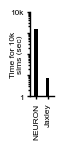

In [84]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.3, 1.1))
    _ = ax.bar([0, 1], [time_neuron, time_jaxley_gpu], width=0.3, color="k")
    _ = ax.set_xticks([0, 1])
    _ = ax.set_yscale("log")
    _ = ax.set_xticklabels(["NEURON", "Jaxley"], rotation=90)
    _ = ax.set_xlim([-0.5, 1.5])
    _ = ax.set_yticks([1.0, 10.0, 100.0, 1000.0, 10_000.0])
    _ = ax.set_yticklabels([1, "", "", "", "10k"])
    _ = ax.set_ylim([1.0, 10000])
    _ = ax.set_ylabel("Time for 10k\nsims (sec)", labelpad=-9)
    plt.savefig("../svg/panel_b0.svg", transparent=True, bbox_inches="tight")
    plt.show()

### Panel B

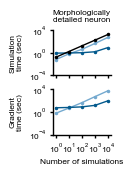

In [85]:
cols = {"neuron": "k", "jaxley_cpu": "#74a9cf", "jaxley_gpu": "#045a8d"}
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(0.74, 1.36))
    for i, sim_or_grad in enumerate(["simulation", "gradient"]):
        for j, modality in enumerate(["parameters"]):
            for device in timings[f"{sim_or_grad}"][f"{modality}"].keys(): # ["jaxley_cpu", "jaxley_gpu", "neuron"]:
                batch_sizes = list(timings[f"{sim_or_grad}"][f"{modality}"][f"{device}"].keys())
                timing_values = list(timings[f"{sim_or_grad}"][f"{modality}"][f"{device}"].values())
                ax[i].plot(batch_sizes, timing_values, 'o-', ms=1.5, color=cols[device])
                # ax[j, i].scatter(batch_sizes, timing_values)
                ax[i].set_yscale("log")
                ax[i].set_xscale("log")
                ax[i].set_ylim([0.0001, 10_000])
                # ax[j, i].text(10, 4_000, modality)
                ax[i].set_xticks(batch_sizes)
                ax[i].set_yticks([0.0001, 1.0, 10_000.0])
    ax[0].set_xticklabels([])
    ax[0].set_title("Morphologically\ndetailed neuron")
    ax[1].set_xlabel("Number of simulations", labelpad=2)
    # ax[0, 0].legend(["jaxley\ncpu", "jaxley\ngpu", "neuron"], loc="upper right", bbox_to_anchor=[3.15, 1.7, 0.0, 0.0])
    ax[0].set_ylabel("Simulation\ntime (sec)")
    ax[1].set_ylabel("Gradient\ntime (sec)")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.savefig("../svg/panel_b1.svg", transparent=True, bbox_inches="tight")
    plt.show()

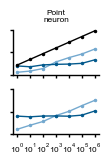

In [87]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(1.1, 1.36))
    for i, sim_or_grad in enumerate(["simulation", "gradient"]):
        for j, modality in enumerate(["parameters"]):
            for device in timings_pointneuron[f"{sim_or_grad}"][f"{modality}"].keys(): # ["jaxley_cpu", "jaxley_gpu", "neuron"]:
                batch_sizes = list(timings_pointneuron[f"{sim_or_grad}"][f"{modality}"][f"{device}"].keys())
                timing_values = list(timings_pointneuron[f"{sim_or_grad}"][f"{modality}"][f"{device}"].values())
                ax[i].plot(batch_sizes, timing_values, 'o-', ms=1.5, color=cols[device], clip_on=False)
                # ax[j, i].scatter(batch_sizes, timing_values)
                ax[i].set_yscale("log")
                ax[i].set_xscale("log")
                ax[i].set_ylim([0.0001, 10_000])
                # ax[j, i].text(10, 4_000, modality)
                ax[i].set_xticks(batch_sizes)
                ax[i].set_yticks([0.0001, 1.0, 10_000.0])
                ax[i].set_yticklabels([])
    ax[0].set_xticklabels([])
    ax[0].set_title("Point\nneuron")
    # ax[1].set_xlabel("Batchsize", labelpad=2)
    # ax[0, 0].legend(["jaxley\ncpu", "jaxley\ngpu", "neuron"], loc="upper right", bbox_to_anchor=[3.15, 1.7, 0.0, 0.0])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.savefig("../svg/panel_b2.svg", transparent=True, bbox_inches="tight")
    plt.show()

# Large scale net

### Panel f

In [88]:
with open("../results/02_large_scale/voltages.pkl", "rb") as handle:
    s_net = pickle.load(handle)

dt = 0.025
time_vec = np.arange(0, 199.9+dt, dt)
from jaxley.utils.colors import network_cols

In [89]:
sf = 40
_ = np.random.seed(0)
cols = np.asarray(network_cols([1*sf, 20*sf, 15*sf, 14*sf+1])) # , 10*sf, 1]))
permutation = np.random.permutation(np.arange(len(cols)))
cols = cols[permutation]
cols[-1] = [0.0, 0.0, 0.0, 1.0]

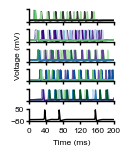

In [90]:
# sf = 12
# cols = network_cols([10*sf, 14*sf, 10*sf, 10*sf, 10*sf, 1*sf])

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(6, 1, figsize=(1.1, 1.45))
    for i in np.arange(0, len(s_net), 40):
        if i < sf * 10:
            layer = 0
        elif i < sf * 20:
            layer = 1
        elif i < sf * 30:
            layer = 2
        elif i < sf * 40:
            layer = 3
        elif i < sf * 50:
            layer = 4
        else:
            layer = 5
        _ = ax[layer].plot(time_vec, s_net[i, :-1], c=cols[i])
    ax[layer].set_xlabel("")
    ax[layer].set_xlim([0, max(time_vec)])
    ax[layer].set_xlabel("Time (ms)")
    ax[-4].set_ylabel("Voltage (mV)", labelpad=1)
    for i in range(6):
        ax[i].set_ylim([-80, 50])
        ax[i].set_yticks([-80, 50])
        ax[i].set_xticks([0, 40, 80, 120, 160, 200])
        ax[i].set_xlim([0, 200])
    ax[-1].tick_params(axis='y', which='major', pad=1)
    for i in range(5):
        ax[i].set_yticklabels([])
    for i in range(5):
        ax[i].set_xticklabels([])
    plt.subplots_adjust(hspace=0.6)
    plt.savefig("../svg/panel_c2.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Assemble figure

In [29]:
import time
import IPython.display as IPd
from svgutils.compose import *

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "18.0cm",
    "3.9cm",

    Panel(
        SVG("../svg/panel_a1.svg").scale(svg_scale),
        Text("d", 15, -2.0, **kwargs_text),
        Text("Accurate simulation with implicit Euler", 24, -2.0, **kwargs_text_normal),
        Line([[60.0, 44.0], [84.0, 44.0]]),
        Line([[60.0, 46.0], [84.0, 50.0]]),
        Line([[60.0, 72.0], [85.0, 76.0]]),
        Line([[60.0, 74.0], [84.0, 82.0]]),
        Line([[60.0, 100.0], [84.0, 107.0]]),
        Line([[60.0, 102.0], [81.5, 113.0]]),
    ).move(-15, 10),
    
    Panel(SVG("../svg/panel_a2.svg").scale(svg_scale)).move(38, 15),
    Panel(SVG("../svg/panel_a3.svg").scale(svg_scale)).move(93, 98),

    Panel(
        SVG("../svg/panel_b0.svg").scale(svg_scale),
        Text("e", 0, -6.0, **kwargs_text),
        Text("GPU speedup", 13, -6.0, **kwargs_text_normal),
    ).move(158, 14),

    Panel(SVG("../svg/panel_b1.svg").scale(svg_scale)).move(223, -5),
    Panel(SVG("../svg/panel_b2.svg").scale(svg_scale)).move(325, -5),
    Panel(SVG("../svg/panel_b3.svg")).move(425, 28),

    Panel(
        Text("f", -25, -2.0, **kwargs_text),
        Text("Simulate and train biophysical networks", 11, -2.0, **kwargs_text_normal),
    ).move(500, 10),

    Panel(
        Text("2000 neurons & 1M synapses", -24, 0.0, **kwargs_text_normal),
        Text("Sim: 21 sec, backprop: 144 sec", -24, 10.0, **kwargs_text_normal),
        # Text("6,000 synapses", 0, 10.0, **kwargs_text_normal),
    ).move(498, 132),

    # Panel(
    #     Text("x12", 0, 0.0, **kwargs_text_normal),
    # ).move(550, 76),
    
    Panel(
        SVG("../svg/large_net_3MB.svg").scale(0.7),
    ).move(475, 12),

    Panel(
        SVG("../svg/panel_c2.svg").scale(svg_scale),
    ).move(570, 10),
)

!mkdir -p fig
f.save("../fig/fig2.svg")
svg("../fig/fig2.svg")

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
